# Importing necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering

# Importing Dataset

In [4]:
df = pd.read_csv("C:/Users/Rajinder/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# Exploring our dataset

In [7]:
df.shape

(48895, 16)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [10]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
df_modify = df.drop(columns=["last_review","reviews_per_month"])
print(df_modify.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


In [13]:
df_modify.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


# Selecting Columns for clustering

In [32]:
columns_req = ['id', 'host_id', 'latitude', 'longitude', 'price', 'minimum_nights','number_of_reviews', 'availability_365']

In [33]:
df_new = df_modify[columns_req]
df_new.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
0,2539,2787,40.64749,-73.97237,149,1,9,365
1,2595,2845,40.75362,-73.98377,225,1,45,355
2,3647,4632,40.80902,-73.94190,150,3,0,365
3,3831,4869,40.68514,-73.95976,89,1,270,194
4,5022,7192,40.79851,-73.94399,80,10,9,0


# Checking for null rows

In [34]:
df_new[df_new.isna().any(axis=1)]

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365


In [35]:
df_new.isnull().sum()

id                   0
host_id              0
latitude             0
longitude            0
price                0
minimum_nights       0
number_of_reviews    0
availability_365     0
dtype: int64

# Checking for duplicate rows

In [36]:
df_duplicate_rows = df_new[df_new.duplicated()]
df_duplicate_rows.shape

(0, 8)

In [37]:
df_new.shape

(48895, 8)

# Detecting outliers

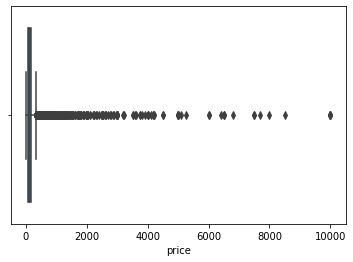

In [38]:
sns.boxplot(x=df_new['price'])

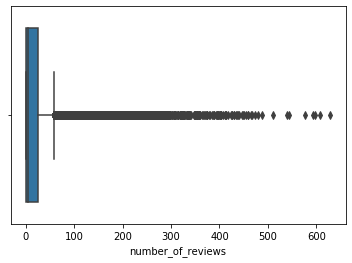

In [39]:
sns.boxplot(x=df_new['number_of_reviews'])

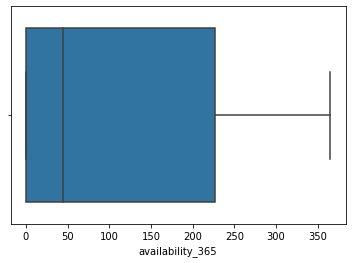

In [40]:
sns.boxplot(x=df_new['availability_365'])

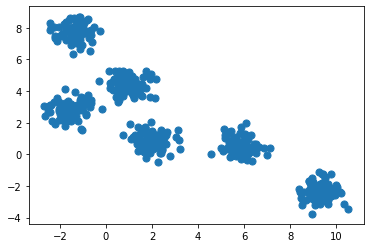

In [59]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=500, centers=6,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

# Hierarchical Clustering

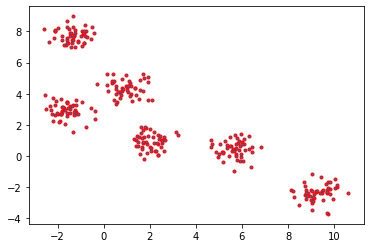

In [61]:
X, y_true = make_blobs(n_samples=300, centers=6,
                       cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], marker='.', edgecolors='red')
plt.show()

In [64]:
agglom = AgglomerativeClustering(n_clusters=6, linkage='average')
# Fit the model with X and y from generated data
agglom.fit(X, y_true)
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6, 4))

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [65]:
x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)

In [66]:
# Get the average distance for X.
X = (X - x_min) / (x_max - x_min)

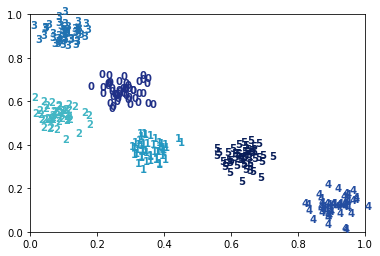

In [72]:
# Display all of the datapoints.
for i in range(X.shape[0]):
    plt.text(X[i, 0], X[i, 1], str(y_true[i]),
             color=plt.get_cmap('YlGnBu_r')(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 10})

In [74]:
# Distance Matrix or Proximity Matrix of points
print("X is: \n",X[:6])
print('\n Y is: \n', y_true[:6])

X is: 
 [[0.0833232  0.54563443]
 [0.64810569 0.40665694]
 [0.96350149 0.13518453]
 [0.94783448 0.07332346]
 [0.33453009 0.43611353]
 [0.07455652 0.56516845]]

 Y is: 
 [2 5 4 4 1 2]


In [77]:
from scipy.spatial import distance_matrix
dist_matrix = distance_matrix(X[0:], X[1:])
print('Distance Matrix: \n', dist_matrix)

Distance Matrix: 
 [[0.58163047 0.97117606 0.98511797 ... 0.58460111 0.55635517 0.93930116]
 [0.         0.41613914 0.44827286 ... 0.08996426 0.11660786 0.38219026]
 [0.41613914 0.         0.06381416 ... 0.38779029 0.41483975 0.03406808]
 ...
 [0.08996426 0.38779029 0.40826972 ... 0.         0.03858599 0.35531179]
 [0.11660786 0.41483975 0.43092866 ... 0.03858599 0.         0.38316633]
 [0.38219026 0.03406808 0.0864808  ... 0.35531179 0.38316633 0.        ]]


In [78]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(dist_matrix, 'complete')

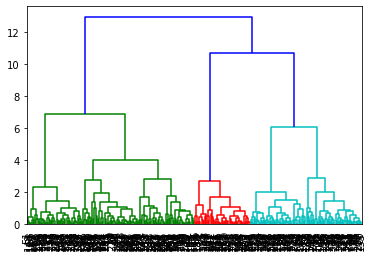

In [81]:
# Plot the dendrogram
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=90.,leaf_font_size=10)
plt.show()

# DBSCAN

In [83]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [120]:
dbscan = DBSCAN(eps=0.1, metric='euclidean', min_samples=5).fit(X)

In [121]:
dbscan.labels_

array([0, 1, 2, 2, 3, 0, 2, 0, 0, 2, 1, 1, 0, 4, 0, 0, 0, 1, 3, 4, 1, 4,
       0, 2, 4, 0, 0, 3, 4, 4, 0, 1, 0, 1, 3, 2, 3, 2, 4, 3, 0, 4, 0, 3,
       1, 1, 1, 0, 0, 0, 2, 4, 0, 4, 1, 0, 4, 0, 1, 4, 1, 3, 3, 4, 2, 1,
       2, 1, 4, 0, 0, 4, 3, 4, 1, 2, 3, 2, 4, 0, 1, 2, 0, 0, 1, 1, 4, 3,
       1, 3, 3, 1, 1, 3, 3, 1, 1, 1, 1, 3, 0, 2, 1, 0, 0, 0, 3, 4, 0, 0,
       4, 3, 3, 4, 0, 4, 2, 3, 3, 3, 0, 2, 4, 3, 3, 2, 0, 4, 4, 0, 0, 0,
       0, 4, 0, 2, 2, 2, 4, 0, 3, 1, 2, 4, 1, 0, 1, 1, 2, 0, 2, 0, 4, 2,
       0, 1, 2, 4, 0, 1, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0, 0, 3, 4, 2, 0, 3,
       3, 0, 1, 0, 0, 2, 4, 0, 0, 0, 4, 3, 0, 4, 2, 3, 0, 0, 0, 0, 1, 4,
       0, 1, 0, 3, 4, 4, 2, 3, 4, 0, 3, 2, 0, 2, 0, 1, 4, 2, 3, 1, 3, 4,
       0, 0, 2, 4, 4, 0, 0, 0, 1, 0, 3, 4, 0, 4, 0, 2, 2, 3, 0, 1, 0, 0,
       4, 0, 2, 0, 2, 1, 2, 3, 0, 0, 1, 1, 2, 1, 4, 3, 0, 3, 4, 2, 3, 0,
       1, 0, 0, 2, 3, 2, 2, 0, 2, 3, 0, 0, 4, 4, 0, 3, 3, 3, 3, 1, 2, 0,
       3, 0, 0, 0, 0, 2, 4, 1, 3, 0, 0, 1, 1, 2], d

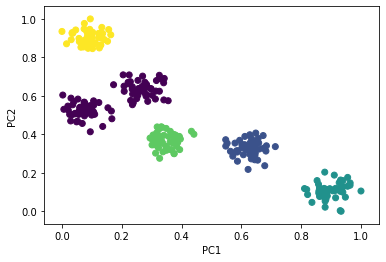

In [122]:

plt.scatter(X[:,0], X[:,1], c = dbscan.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [126]:
from sklearn.metrics import silhouette_score
print("DBSCAN:")
print(silhouette_score(X,dbscan.labels_))

DBSCAN:
0.6746465280475124


# Mean shift

In [103]:
from sklearn.cluster import MeanShift
meanshift=MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1, n_jobs=1, seeds= None).fit(X)

In [104]:
meanshift.labels_

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1], d

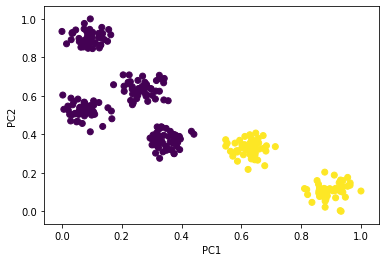

In [108]:
plt.scatter(X[:,0], X[:,1], c = meanshift.labels_)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [127]:
print("Meanshift :")
print(silhouette_score(X,meanshift.labels_))

Meanshift :
0.5956113017319965
